In [1]:
# Render plots inline
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rand
import json
from mlflow import log_metric, log_param, log_artifact
# adjust dimensions of plot area to make it look better
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
def make_df(csv_path):
    """
    Generates a pandas DataFrame for the
    data given in the csv file specified
    by the 'csv_path'.

    Argument:
        csv_path - specifies path to desired csv file
    Returns:
        pandas DataFrame with data from csv file specified in csv_path

    """
    return pd.read_csv(csv_path, header=None, names=['x', 'y'], index_col=False)

In [4]:
def make_data_matrix(x_values, degree):
    """
    Generates a N x (degree+1) dimension
    matrix from the input values (x values)
    of the given dataset. The ith feature (column)
    in the matrix (i=0 to degree+1 (exclusive))
    is - the N input points raised to the power i.

    Arguments:
        x_values - list containing the input data points
        degree - desired degree of the polynomial
    Returns:
        An Nx(degree+1) matrix where ith feature/column
        is the N data points raised to the power i
    """
    X_data = []
    for x_val in x_values:
        col = []
        for power in range(degree+1):
            col.append(x_val ** power)
        X_data.append(col)
    X_matrix = np.array(X_data)
    return X_matrix

In [5]:
def find_predictions(data_matrix, params_vector):
    """
    Gives a Nx1 vector where each entry is the predicted
    value for y, which is calculated using the parameters vector
    obtained from the find_params_vector() method and a row/example
    from the data matrix.

    Arguments:
        data_matrix - matrix generated by the make_data_matrix()
                        method using the input data points - An 
                        Nx(degree+1) matrix where ith feature/column
                        is the N data points raised to the power i
        params_vector - vector containing the values for the parameters that
                        minimize the error function (i.e. solution obtained for w*)
                        from the find_params_vector() method
    """
    return np.array([row.dot(params_vector) for row in data_matrix])

In [6]:
def find_params_over_epochs(step_size, data_x, data_y, num_examples, proportion):
    w0 = 0
    w1 = 0
    stop = False
    count = 0
    params_over_epochs = {}
    while not stop:
        params_over_epochs[count] = [w0, w1]
        for i in range(num_examples):
            idx = rand.randint(0, num_examples-1)
            prediction = w0 + w1*data_x[idx]
            error = prediction - data_y[idx]

            new_w0 = w0 - step_size*error
            new_w1 = w1 - step_size*error*data_x[idx]

            diff_w0 = abs(new_w0 - w0)
            diff_w1 = abs(new_w1 - w1)
            if diff_w0 < proportion*w0 and diff_w1 < proportion*w1:
                stop = True
                break
            w0 = new_w0
            w1 = new_w1

        count += 1

    return params_over_epochs

In [7]:
def find_mse(data_matrix, params_vector, y_values):
    """
    Steps for finding the Mean Square Error - 
    1. Get the prediction values for the input
        data points based on the model found.
    2. Calculate the error vector by differencing
        the vector containing target values and 
        the vector containing the predicted values.
    3. Take the square of the errors found and sum them 
        by taking dot product of the error vector with itself.
    4. Calculate the MSE by dividing the sum of the
        squares of errors with the number of input data points.

    Arguments:
        data_matrix - matrix generated by the make_data_matrix()
                        method using the input data points - An 
                        Nx(degree+1) matrix where ith feature/column
                        is the N data points raised to the power i
        params_vector - vector containing the values for the parameters that
                        minimize the error function (i.e. solution obtained for w*)
                        from the find_params_vector() method
        y_values - list of output data points from given dataset
    Returns:
        Mean Square Error of model for given data set
    """
    y_predictions = find_predictions(data_matrix, params_vector)
    error = y_values - y_predictions
    error_square = error.dot(error)
    mse = error_square/len(y_values)
    return mse

In [8]:
def find_list_mses(data_matrix, params_over_epochs, y_values):
    params_keys = sorted(params_over_epochs.keys())
    dataset_list_mses = []
    for key in params_keys:
        params = params_over_epochs[key]
        dataset_mse = find_mse(data_matrix, params, y_values)
        dataset_list_mses.append(dataset_mse)

    return dataset_list_mses

In [9]:
######## PART 3.1 ########

In [10]:
###### 3.1.(a) ######

In [11]:
init_step_size = 10 ** (-6)

In [12]:
train_df = make_df('./Datasets/Dataset_2_train.csv')

In [13]:
train_x = train_df['x']
train_y = train_df['y']
num_examples = len(train_x)

In [14]:
train_matrix = make_data_matrix(train_x, 1)

In [15]:
params_over_epochs = find_params_over_epochs(
    init_step_size, train_x, train_y, num_examples, 0.0000001)

In [16]:
# for key, p in params_over_epochs.items():
#     print(key, ':', p)

In [17]:
valid_df = make_df('./Datasets/Dataset_2_valid.csv')

In [18]:
valid_x = valid_df['x']
valid_y = valid_df['y']

In [19]:
valid_matrix = make_data_matrix(valid_x, 1)

In [20]:
list_valid_mses = np.array(find_list_mses(
    valid_matrix, params_over_epochs, valid_y))

In [21]:
for idx, valid_mse in enumerate(list_valid_mses):
    print(idx, ':', valid_mse)

0 : 50.40127833857479
1 : 50.34956222298456
2 : 50.300488649391134
3 : 50.252083798481735
4 : 50.205382414140075
5 : 50.15714166032182
6 : 50.10899888977088
7 : 50.05952090412588
8 : 50.01110565054203
9 : 49.964157887698605
10 : 49.91336048597385
11 : 49.86280764320516
12 : 49.81366231080421
13 : 49.765553224526876
14 : 49.71712498981397
15 : 49.66955915365507
16 : 49.62163918975623
17 : 49.57063868349347
18 : 49.52044373908682
19 : 49.47074886915547
20 : 49.4218189434371
21 : 49.37308666062549
22 : 49.326524208118514
23 : 49.276624078047426
24 : 49.227814391888735
25 : 49.17893409968321
26 : 49.129989977238985
27 : 49.08064669826779
28 : 49.03131065510703
29 : 48.98178759071266
30 : 48.934451823107565
31 : 48.889338623699516
32 : 48.84070695446343
33 : 48.79350264479723
34 : 48.74664689082738
35 : 48.699054540337166
36 : 48.65062411601922
37 : 48.601864834407735
38 : 48.554901324844614
39 : 48.5088996663352
40 : 48.45922530222771
41 : 48.41231389766701
42 : 48.364442247393235
43 : 48.

454 : 32.216982891733544
455 : 32.186619747037064
456 : 32.15419320240352
457 : 32.12251117932427
458 : 32.09034716712105
459 : 32.05911936329315
460 : 32.0278799658996
461 : 31.997191210437624
462 : 31.965467069284852
463 : 31.935381274816415
464 : 31.903165777662853
465 : 31.87178381385294
466 : 31.84044922559285
467 : 31.809449203682608
468 : 31.77843654087485
469 : 31.746771464494742
470 : 31.71649570268849
471 : 31.683788669021215
472 : 31.652370774545705
473 : 31.621715351831984
474 : 31.591772339691417
475 : 31.56159915994798
476 : 31.531660729644667
477 : 31.49972268874745
478 : 31.4685584027534
479 : 31.438250142035344
480 : 31.407303379468047
481 : 31.375055587854874
482 : 31.343859527447872
483 : 31.31210594265448
484 : 31.280439337123635
485 : 31.249249453341402
486 : 31.2174629118296
487 : 31.187074510536373
488 : 31.15620980085254
489 : 31.126082538566546
490 : 31.09534455990377
491 : 31.063945106789394
492 : 31.03254110318061
493 : 31.002672393435542
494 : 30.97158534345

788 : 23.20197004909192
789 : 23.178863472384748
790 : 23.15581011270953
791 : 23.132448682025533
792 : 23.110589320163026
793 : 23.08785411837388
794 : 23.065160845787087
795 : 23.04233478227051
796 : 23.01950214551567
797 : 22.996646055900058
798 : 22.97391566444714
799 : 22.95228661431358
800 : 22.931069374430553
801 : 22.907930643625697
802 : 22.885567038594036
803 : 22.86246133723699
804 : 22.840502852569625
805 : 22.817839665504234
806 : 22.79493560279044
807 : 22.77300854364034
808 : 22.750524447611316
809 : 22.72838540424489
810 : 22.706390093781433
811 : 22.683620565848322
812 : 22.66075429737701
813 : 22.639074643405557
814 : 22.61607957975791
815 : 22.594114540991583
816 : 22.573514896217066
817 : 22.5507140490758
818 : 22.52892018172619
819 : 22.50706559764261
820 : 22.484624165268954
821 : 22.463178969833578
822 : 22.440280022461614
823 : 22.418322800479803
824 : 22.396601207212473
825 : 22.373959920908675
826 : 22.353154650761113
827 : 22.33177895492958
828 : 22.310560808

1195 : 15.581956492686558
1196 : 15.566877500012309
1197 : 15.55191228521138
1198 : 15.536306666836467
1199 : 15.52107726032169
1200 : 15.505541227976378
1201 : 15.489554197594112
1202 : 15.47532418904406
1203 : 15.460650176186212
1204 : 15.446316711313353
1205 : 15.431854513930226
1206 : 15.416620085161316
1207 : 15.401086932234687
1208 : 15.386616836233358
1209 : 15.371397798326111
1210 : 15.356202212470462
1211 : 15.340904219006125
1212 : 15.32613247108762
1213 : 15.310737356907175
1214 : 15.295814054235775
1215 : 15.281239377227102
1216 : 15.266250918919095
1217 : 15.251537134329647
1218 : 15.236378014132901
1219 : 15.221649476605762
1220 : 15.206686801074794
1221 : 15.192485101483685
1222 : 15.178245728256389
1223 : 15.164304265606892
1224 : 15.150291636101862
1225 : 15.136019949481838
1226 : 15.120765098061389
1227 : 15.106987401861007
1228 : 15.092332136163018
1229 : 15.078409078475854
1230 : 15.063687663941483
1231 : 15.048190423796443
1232 : 15.033451115239595
1233 : 15.017980

1621 : 10.290259824895992
1622 : 10.28020599376823
1623 : 10.270115074327222
1624 : 10.259932772625
1625 : 10.250103566066914
1626 : 10.239923607193518
1627 : 10.2302735313318
1628 : 10.21995772928252
1629 : 10.209994987139943
1630 : 10.200013452368507
1631 : 10.190367083245894
1632 : 10.180248294457245
1633 : 10.170158786802098
1634 : 10.160711291400883
1635 : 10.150654569941459
1636 : 10.140682120110654
1637 : 10.131166237652728
1638 : 10.121373459407215
1639 : 10.111465656119774
1640 : 10.101825801824432
1641 : 10.092111075093191
1642 : 10.082110855025615
1643 : 10.07241513466548
1644 : 10.06282760748091
1645 : 10.053333145868862
1646 : 10.043361109486964
1647 : 10.033251035844673
1648 : 10.023641475240659
1649 : 10.013886954027452
1650 : 10.004218992448017
1651 : 9.993888659739186
1652 : 9.984491624653053
1653 : 9.97444765518329
1654 : 9.96468322014017
1655 : 9.955113685245983
1656 : 9.945695926174546
1657 : 9.936101470678558
1658 : 9.926783486893086
1659 : 9.917084316441112
1660 :

2028 : 6.947457310971848
2029 : 6.940934813520385
2030 : 6.9342445899397775
2031 : 6.927695095838551
2032 : 6.921352192944671
2033 : 6.914696054390588
2034 : 6.908142939299221
2035 : 6.9014663766649145
2036 : 6.894860507314867
2037 : 6.887806781316613
2038 : 6.881200166745723
2039 : 6.874760457852042
2040 : 6.8681052846871715
2041 : 6.8617551177394285
2042 : 6.855207030595225
2043 : 6.848685071220322
2044 : 6.8423131101771535
2045 : 6.835811617490634
2046 : 6.829237977064816
2047 : 6.822742748554133
2048 : 6.816024532905485
2049 : 6.809634434191269
2050 : 6.802813884971541
2051 : 6.796542171149735
2052 : 6.790097439000118
2053 : 6.78355917569886
2054 : 6.777335552145541
2055 : 6.771026298919075
2056 : 6.764632270004422
2057 : 6.758175217173746
2058 : 6.751607499615241
2059 : 6.745202131558177
2060 : 6.73898713911152
2061 : 6.732541912549973
2062 : 6.726115857249382
2063 : 6.719432102524569
2064 : 6.713195605388471
2065 : 6.706836888188644
2066 : 6.700227948721254
2067 : 6.6940287898460

In [ ]:
###### 3.1.(b) ######

In [22]:
list_train_mses = np.array(find_list_mses(
    train_matrix, params_over_epochs, train_y))

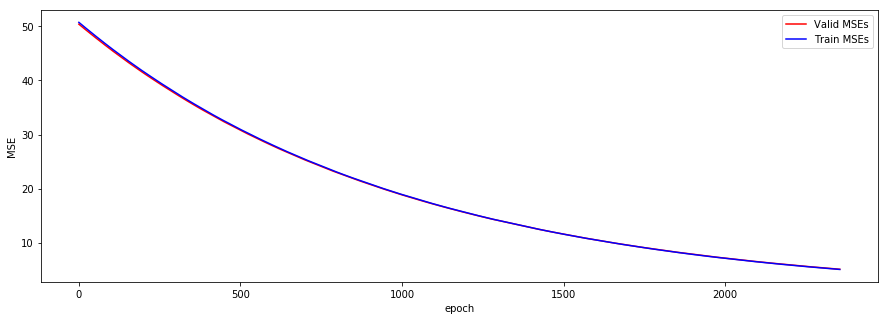

In [23]:
plt.plot(sorted(params_over_epochs.keys()),
         list_valid_mses, 'r', label='Valid MSEs')
plt.plot(sorted(params_over_epochs.keys()),
         list_train_mses, 'b', label='Train MSEs')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
######## PART 3.2 ########

In [ ]:
###### 3.2.(a) ######

In [24]:
list_step_sizes = [1, 0.5, 10**(-1), 10**(-1)/2, 10**(-2), 10**(-2)/2, 10**(-3), 10**(-3)/2, 10**(-4), 10**(-4)/2, 10**(-5), 10**(-6)]
valid_mse_step_size = {'step_size': list_step_sizes, 'valid_mse': [], 'params': []}

In [25]:
for step_size in list_step_sizes:
    params_over_epochs = find_params_over_epochs(step_size, train_x, train_y, num_examples, 10**(-7))
    final_key = max(params_over_epochs.keys())
    final_params = params_over_epochs[final_key]
    valid_mse_step_size['params'].append(final_params)
    valid_mse = find_mse(valid_matrix, final_params, valid_y)
    valid_mse_step_size['valid_mse'].append(valid_mse)
    print("Done:", step_size)

Done: 1
Done: 0.5
Done: 0.1
Done: 0.05
Done: 0.01
Done: 0.005
Done: 0.001
Done: 0.0005
Done: 0.0001
Done: 5e-05
Done: 1e-05
Done: 1e-06


In [27]:
valid_mse_step_size_df = pd.DataFrame(data=valid_mse_step_size)

In [28]:
valid_mse_step_size_df

,params,step_size,valid_mse
0,"[4.297806614755417, 6.186818283084968]",1.000000,5.150194
1,"[3.6820307541505404, 4.264015731429388]",0.500000,0.079552
2,"[3.6799010650013018, 4.4031969644009585]",0.100000,0.096576
3,"[3.585696118518043, 4.339331390811895]",0.050000,0.073554
4,"[3.551652288704744, 4.324573494364959]",0.010000,0.074814
5,"[3.7001009331773194, 4.192404420193073]",0.005000,0.082322
6,"[3.9695614512871518, 3.7711909480284795]",0.001000,0.157460
7,"[3.757061087493041, 3.401558371226435]",0.000500,0.546891
8,"[3.39551710243344, 3.0692261500338445]",0.000100,1.705296
9,"[3.392879474713817, 3.032554963386048]",0.000050,1.794170


In [38]:
for p in valid_mse_step_size_df['params']:
    print(p[0], p[1])

4.297806614755417 6.186818283084968
3.6820307541505404 4.264015731429388
3.6799010650013018 4.4031969644009585
3.585696118518043 4.339331390811895
3.551652288704744 4.324573494364959
3.7001009331773194 4.192404420193073
3.9695614512871518 3.7711909480284795
3.757061087493041 3.401558371226435
3.39551710243344 3.0692261500338445
3.392879474713817 3.032554963386048
3.0653769108044706 2.7269095296541175
2.851271020135174 2.530437227511242


In [ ]:
log_param("Step size - Valid MSE - Parameters", valid_mse_step_size_df)

In [ ]:
# log_metric("3.2.(a) Table", valid_mse_step_size_df)

In [ ]:
# plt.plot(valid_mse_step_size_df['step_size'], valid_mse_step_size_df['valid_mse'], 'b', label='Valid MSEs')
# plt.xlabel('Step Size')
# plt.ylabel('Valid MSE')
# plt.legend()
# plt.show()

In [ ]:
###### 3.2.(b) ######

In [29]:
valid_mses = valid_mse_step_size_df['valid_mse']
print(type(valid_mses))
idx_min_valid_mse = valid_mses.idxmin
best_step_size = valid_mse_step_size_df['step_size'][idx_min_valid_mse]

<class 'pandas.core.series.Series'>


In [30]:
best_step_size

0.05

In [31]:
test_df = make_df('./Datasets/Dataset_2_test.csv')
test_x = test_df['x']
test_y = test_df['y']

In [32]:
test_matrix = make_data_matrix(test_x, 1)

In [33]:
test_params = valid_mse_step_size_df['params'][idx_min_valid_mse]

In [34]:
test_mse = find_mse(test_matrix, test_params, test_y)

In [35]:
test_mse

0.06981675209679272

In [ ]:
log_param("3.2.b Test MSE", test_mse)

In [ ]:
######## PART 3.3 ########